# PROGETTO FINALE DEL CORSO DI NLP

### Consegna 

Il CEO dell'azienda ha richiesto di identificare le email di tipo SPAM sulle quali fare analisi contenutistiche.

Il CTO nello specifico ti fornisce un dataset e ti chiede di:
- Addestrare un classificatore per identificare SPAM
- Individuare i Topic principali tra le email SPAM presenti nel dataset
- Calcolare la distanza semantica tra i topics ottenuti, per dedurne l'eterogeneità.
- Estrarre dalle mail NON SPAM le Organizzazioni presenti.

### Svolgimento 

Il progetto sarà diviso in più parti per rispondere a ognuno dei punti richiesti. Iniziamo caricando il dataset e realizziamo una prima analisi esplorativa dei dati

# EDA


In [39]:
# Importiamo librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# dataset
df=pd.read_csv("./spam_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [41]:
df.shape

(5171, 4)

Osserviamo l'header del dataframe. La prima colonna sembrerebbe un indice. Abbiamo due colonne che rappresentano il label, sia in forma estesa che codificata in 0 e 1. La colonna text contiene il messaggio dell'email vero e proprio. 

In [42]:
values_spam=df.label.value_counts()
print(values_spam)


label
ham     3672
spam    1499
Name: count, dtype: int64


/var/folders/3r/287mdtv145qd1c6nz1jkmqy00000gn/T/ipykernel_1379/2237560863.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(values_spam,kind="bar",palette=["violet","orange"])


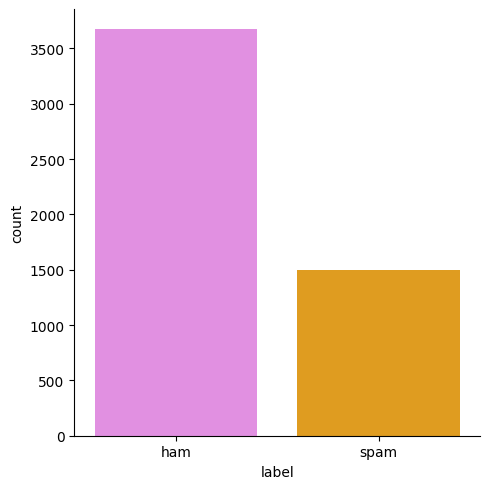

In [43]:
sns.catplot(values_spam,kind="bar",palette=["violet","orange"])

Come possiamo vedere dal barplot, il dataset non è bilanciato. Anche se non in modo eccessivo, la classe spam è in minoranza.
Quantifichiamolo anche di più con il calcolo percentuale

In [44]:
values_spam/len(df.label)*100

label
ham     71.01141
spam    28.98859
Name: count, dtype: float64

Poco meno di un terzo del nostro dataset è composto da email spam, il resto sono email normali.
Vediamo ora il testo delle email. 
Stampando quale esempio possiamo vedere che hanno tutti una struttura simile: Contengono l'oggetto dell'email "Subject" e a capo, il testo vero e proprio.

In [45]:
print(df.text[4])

Subject: re : indian springs
this deal is to book the teco pvr revenue . it is my understanding that teco
just sends us a check , i haven ' t received an answer as to whether there is a
predermined price associated with this deal or if teco just lets us know what
we are giving . i can continue to chase this deal down if you need .


Prima di procedere con il preprocessing, osserviamo la distribuzione delle lunghezze delle email e poi dividendo tra spam e non spam

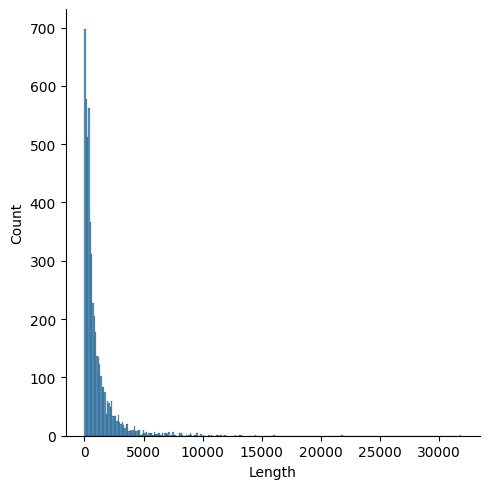

In [46]:
df1=df
df1["Length"]=df.text.apply(len)

sns.displot(df1,x='Length')

/var/folders/3r/287mdtv145qd1c6nz1jkmqy00000gn/T/ipykernel_1379/2223381613.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df1,x="label",y="Length",palette=["violet","orange"])


<Axes: xlabel='label', ylabel='Length'>

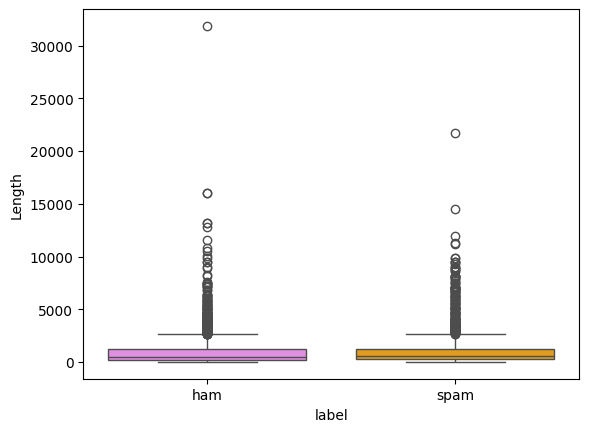

In [47]:
sns.boxplot(df1,x="label",y="Length",palette=["violet","orange"])

Non c'è una particolare differenza in termini di lunghezza tra email spam e non spam.

Iniziamo con il preprocessing del testo

# Preprocessing

Il preprocessing è il primo step fondamentale per ogni task di NLP. Gli step che saranno eseguiti saranno: 

* Trasformazione del testo in lowercase
* Rimozione della punteggiatura e delle stop_words
* Rimozione dei numeri
* Rimozione degli spazi bianchi in più 
* Tokenizzazione e lemmatizzazione 

In [48]:
# Importiamo le librerie necessarie
import nltk
from nltk.corpus import stopwords
import string
import re 
from tqdm import tqdm
import spacy

In [49]:
nlp = spacy.load('en_core_web_trf')


In [50]:
## Creo funzione per eseguire questi step che applicheremo a ogni frase contenuta nel df
stop_words = list(stopwords.words('english'))

def clean_email(email,stop_words):
    
    # Step 1 : lowecase
    email = email.lower()
    # Rimozione stopword
    stop_words.append("subject:") # Usiamo questo step anche per rimuovere la parola Subject che è presente in ogni email
    email = ' '.join(word for word in email.split() if word not in stop_words)
    # Rimozione punteggiatura 
    for punt in string.punctuation:
        email = email.replace(punt, " ")
    email = re.sub('\d', ' ', email)
    document = nlp(email)
    email= ' '.join(token.lemma_ for token in document)
    email_cleaned = re.sub(' +', ' ', email).strip()
    
    return email_cleaned

In [51]:
# Creaimo ora la funzione per applicare il nostro cleaner a tutto il dataset 
def clean_corpus(corpus,stop_words):
    cleaned_corpus = []
    
    for document in tqdm(corpus, unit="document"):
        cleaned_corpus.append(clean_email(document,stop_words))
    
    return cleaned_corpus

Possiamo ora applicarlo a tutto il nostro dataset. Creaiamo una nuova colonna dove salviamo le email processate.

In [52]:
#df["processed_text"]=clean_corpus(df.text,stop_words)

La fase di preprocessamento ha richiesto circa 20 minuti. Salviamo il dataset processato per le prossime volte

In [53]:
#df.to_csv('spam_dataset_preprocessato.csv', index=False)
df = pd.read_csv('spam_dataset_preprocessato.csv')

In [54]:
# Alcuni test processati sono na. Vediamo di capire perché.
# Stampiamo il testo originale per capire se è un errore di preprocessamento o meno
for _,null in df[df.processed_text.isna()].iterrows():
    print(null.text)

Subject: 

Subject: 

Subject: 

Subject: 

Subject: 

Subject: 

Subject: 

Subject: re [ 8 ]

Subject: 

Subject: 

Subject: 

Subject: 

Subject: ? ? ? ? 13 ? ? ? ? ? ? ? * ? * ? * ?
 234567890
 234567890
 234567890
 234567890
Subject: 

Subject: 

Subject: 

Subject: 

Subject: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
???? ??? ????? ?????? ?????? ????

Subject: 



Possiamo vedere che queste email hanno testi molto particolari: o sono completamente vuote o contengono solo numeri e simboli di punteggiatura. Non dobbiamo far altro che rimuoverle

In [55]:
df = df.dropna()


# Sistema di Spam Detection

Il primo task prevede la creazione di un modello in grado di riconoscre le email SPAM e quelle non SPAM.
Applichiamo TFVectorizer sul nostro dataset, dopo aver diviso in train e test 

In [56]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [57]:
# Eseguiamo il train e test split 
X = df['processed_text'].values
y = df['label_num'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [58]:
vectorizer = TfidfVectorizer()
X_train_vec=vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)

# Scelta del modello

Valutiamo diversi modelli e valutiamo quale performa meglio sui nostri dati. Inizialmente con i parametri di default, successivamente proveremo eventualmente a migliorare gli iperparametri se necessario

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import datasets, svm
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
model1=LogisticRegressionCV()

model1.fit(X_train_vec,y_train)
pred1=model1.predict(X_test_vec)
model1.score(X_test_vec, y_test)

0.9857697283311773

In [60]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, pred1)))
print('SVC f1-score  : {:.4f}'.format(f1_score(pred1, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(pred1, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(pred1, y_test)))
print("\n", classification_report(pred1, y_test))


Accuracy Score: 0.9858
SVC f1-score  : 0.9771
SVC precision : 0.9916
SVC recall    : 0.9631

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       529
           1       0.99      0.96      0.98       244

    accuracy                           0.99       773
   macro avg       0.99      0.98      0.98       773
weighted avg       0.99      0.99      0.99       773



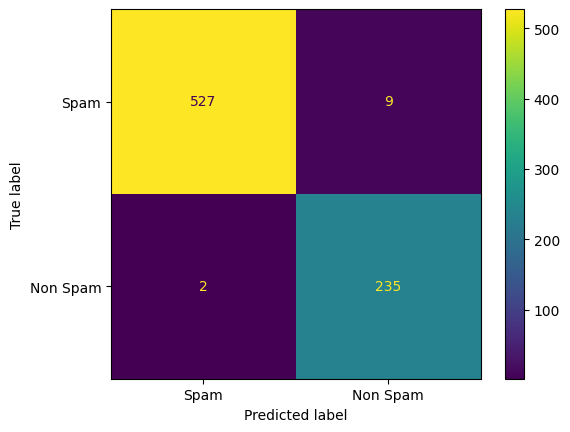

In [61]:
mat1=confusion_matrix(y_test,pred1)
cm_display=ConfusionMatrixDisplay(mat1,display_labels=["Spam","Non Spam"])
cm_display.plot()
plt.show()

Già con una regressione logistica otteniamo dei risultati dignitosi. Proviamo qualche altro modello

### SVC 


In [62]:
from sklearn import svm
model2=svm.SVC(kernel='sigmoid', C=1)
model2.fit(X_train_vec, y_train)
pred2=model2.predict(X_test_vec)

In [63]:
model2.score(X_test_vec, y_test)

0.9844760672703752

In [64]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, pred2)))
print('SVC f1-score  : {:.4f}'.format(f1_score(pred2, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(pred2, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(pred2, y_test)))
print("\n", classification_report(pred2, y_test))


Accuracy Score: 0.9845
SVC f1-score  : 0.9749
SVC precision : 0.9831
SVC recall    : 0.9668

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       532
           1       0.98      0.97      0.97       241

    accuracy                           0.98       773
   macro avg       0.98      0.98      0.98       773
weighted avg       0.98      0.98      0.98       773



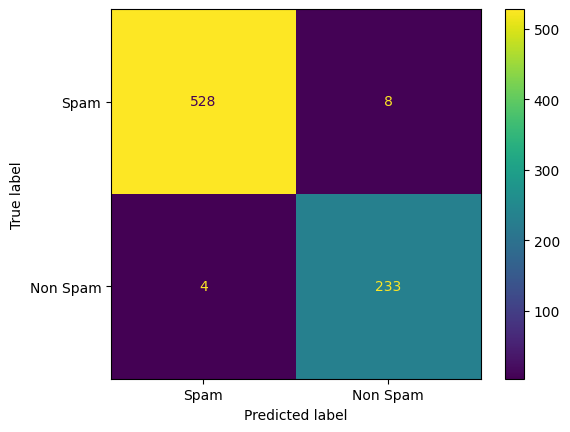

In [65]:
mat2=confusion_matrix(y_test,pred2)
cm_display=ConfusionMatrixDisplay(mat2,display_labels=["Spam","Non Spam"])
cm_display.plot()
plt.show()

In [66]:
from sklearn.model_selection import cross_val_score

model3= svm.SVC(kernel='sigmoid', C=1, random_state=42)
scores = cross_val_score(model3, X_train_vec, y_train, cv=10)


In [67]:
print(scores.mean())


0.9858421366101376


### XGBOOST

In [68]:
import xgboost as xgb

model4 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

model4.fit(X_train_vec, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [69]:
pred4=model4.predict(X_test_vec)
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, pred4)))
print('SVC f1-score  : {:.4f}'.format(f1_score(pred4, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(pred4, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(pred4, y_test)))
print("\n", classification_report(pred4, y_test))

Accuracy Score: 0.9702
SVC f1-score  : 0.9526
SVC precision : 0.9747
SVC recall    : 0.9315

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       525
           1       0.97      0.93      0.95       248

    accuracy                           0.97       773
   macro avg       0.97      0.96      0.97       773
weighted avg       0.97      0.97      0.97       773



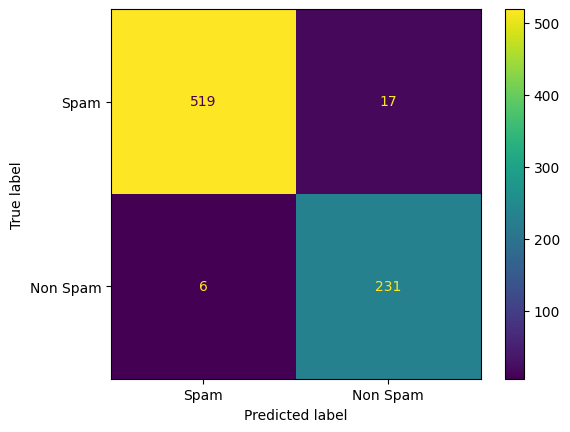

In [70]:
mat4=confusion_matrix(y_test,pred4)
cm_display=ConfusionMatrixDisplay(mat4,display_labels=["Spam","Non Spam"])
cm_display.plot()
plt.show()

### Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

model5 = RandomForestClassifier(max_depth=150, random_state=43)
model5.fit(X_train_vec,y_train)

RandomForestClassifier(max_depth=150, random_state=43)

In [72]:
pred5=model5.predict(X_test_vec)
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, pred5)))
print('SVC f1-score  : {:.4f}'.format(f1_score(pred5, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(pred5, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(pred5, y_test)))
print("\n", classification_report(pred5, y_test))

Accuracy Score: 0.9767
SVC f1-score  : 0.9625
SVC precision : 0.9747
SVC recall    : 0.9506

               precision    recall  f1-score   support

           0       0.98      0.99      0.98       530
           1       0.97      0.95      0.96       243

    accuracy                           0.98       773
   macro avg       0.98      0.97      0.97       773
weighted avg       0.98      0.98      0.98       773



### Ottimizzazione degli iperparamtri. 
Proviamo a ottimizzare gli iperparametri del modello SVM che ha dato buoni risultati

In [73]:
from sklearn.model_selection import GridSearchCV 
  

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','sigmoid']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
grid.fit(X_train_vec, y_train) 

In [74]:
# Stampiamo 
print(grid.best_params_) 
print(grid.best_estimator_) 

NameError: name 'grid' is not defined

In [ ]:
# Testiamo ora il nostro modello sul test set
grid_predictions = grid.predict(X_test_vec) 
  
#Confrontiamo con il modello SVM che avevamo testato prima
print(classification_report(y_test, grid_predictions)) 
print(classification_report(y_test, pred2)) 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       536
           1       0.96      0.98      0.97       237

    accuracy                           0.98       773
   macro avg       0.98      0.98      0.98       773
weighted avg       0.98      0.98      0.98       773

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       536
           1       0.97      0.98      0.97       237

    accuracy                           0.98       773
   macro avg       0.98      0.98      0.98       773
weighted avg       0.98      0.98      0.98       773



Le metriche non sono migliorate particolamente. Anzi la precision sulla classe spam è scesa leggermente.
Tutti i modelli hanno però nel complesso buone metriche

## TOPIC MODELING


La seconda parte del progetto prevede l'applicazione del Topic Modeling sulle email spam

In [75]:
# Importiamo le librerie necessarie

from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import TfidfModel
# Importiamo queste librerie per la visualizzazione
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

Estraiamo le email SPAM dal nostro dataset, in cui abbiamo già la colonna contente il testo preprocessato

In [76]:

spam_email=df[df["label"]=="spam"]


In [77]:
spam_comment=[]

for _,row in df.iterrows():
    list_row=row["processed_text"].split()
    spam_comment.append(list_row)

In [78]:
dictionary = Dictionary(spam_comment)
corpus = [dictionary.doc2bow(text) for text in spam_comment]

tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [79]:
# Proviamo con un numero iniziale di Topic
import gensim
num_topics = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

In [80]:
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.088*"ect" + 0.046*"hou" + 0.031*"enron" + 0.014*"meter" + 0.014*"deal"')
(1, '0.013*"pec" + 0.013*"http" + 0.011*"font" + 0.010*"td" + 0.008*"com"')
(2, '0.007*"com" + 0.006*"company" + 0.006*"please" + 0.005*"get" + 0.004*"information"')
(3, '0.016*"com" + 0.015*"deal" + 0.014*"gas" + 0.013*"hpl" + 0.012*"enron"')
(4, '0.003*"calpine" + 0.001*"de" + 0.001*"ricky" + 0.001*"enw" + 0.001*"london"')


In [81]:
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(ldamodel, corpus, dictionary, sort_topics=False)

pyLDAvis.display(lda_display)

In [102]:

from gensim.models import CoherenceModel,LdaMulticore
topics = []
score = []
for i in range(1,10,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary , iterations=5, num_topics=i, workers = 1, passes=20, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())


/Users/lorenzodemarco/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/lorenzodemarco/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/lorenzodemarco/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/lorenzodemarco/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+,

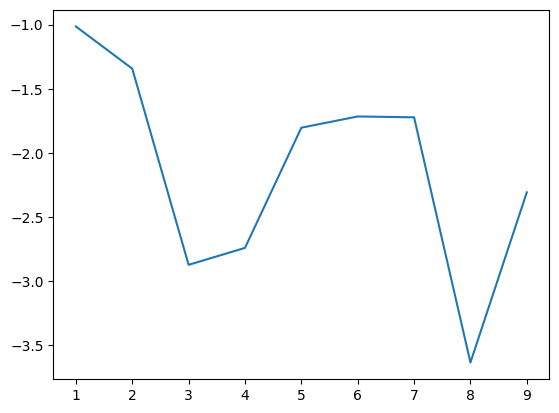

In [111]:
plt.plot(topics,score)
plt.show()

In [113]:
num_topics = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(ldamodel, corpus, dictionary, sort_topics=False)

pyLDAvis.display(lda_display)

# Estrarre dalle mail NON SPAM le Organizzazioni presenti

L'ultima parte del progetto prevede estrarre le organizzazzione delle email non spam. Utilizzeremo la libreria spacy per questo task di Named Entity Recognition



In [114]:
import spacy

nlp = spacy.load('en_core_web_trf', disable=['parser'])

Per prima cosa estraiamo dal nosto dataset le email non spam

In [115]:
no_spam_email=df[df["label"]=="ham"]

Estraiamo per ogni documento le organizzazioni. Salviamo i risultati in un dizionario

In [124]:
organizations_doc={}
for document in tqdm(no_spam_email["processed_text"], desc="Organizations", unit="document"):
    
    organizations = []
    doc = nlp(document)
    for token in doc:
        if str(token.ent_type_) =="ORG":
            organizations.append(str(token))
    
    organizations_doc[document]=organizations
            
    
        

Organizations: 100%|██████████| 3672/3672 [05:27<00:00, 11.21document/s]


In [125]:
organizations_doc

{'enron methanol meter follow note give monday preliminary flow datum provide daren please override pop daily volume presently zero reflect daily activity obtain gas control change need asap economic purpose': ['enron',
  'methanol'],
 'hpl nom january see attach file hplnol xls hplnol xl': [],
 'neon retreat ho ho ho around wonderful time year neon leader retreat time know time year extremely hectic tough think anything past holiday life go past week december january like think minute calender hand begin fall semester retreat schedule weekend january youth ministers conference brad dustin connect week go change date follow weekend january come part need think think agree important we get together time recharge battery get far spring semester lot trouble difficult we get away without kid etc brad come potential alternative get together weekend let know prefer first option would retreat similar do past several year year could go heartland country inn www com outside brenham nice place b